### 1 Working with Satellite Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

ds = rasterio.open('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF')
ds

<open DatasetReader name='E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF' mode='r'>

In [2]:
ds.transform

Affine(30.0, 0.0, 658185.0,
       0.0, -30.0, -203985.0)

In [3]:
ds.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 20N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-63],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32620"]]')

In [4]:
ds.indexes

(1,)

In [5]:
img = ds.read(1)
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [6]:
img.shape

(7761, 7601)

In [7]:
img.min(), img.max()

(0, 52562)

In [8]:
img[3000,3000]

8861

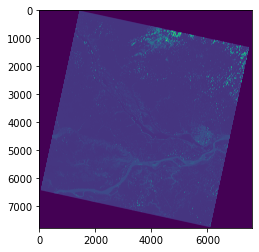

In [9]:
plt.imshow(img)

### 2 Satellite Image Analysis

In [10]:
b2 = rasterio.open('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF')
b3 = rasterio.open('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF')
b4 = rasterio.open('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF')

In [11]:
img = {
    'B2':b2,
    'B3':b3,
    'B4':b4
}

In [12]:
from pathlib import Path

def load_landsat_image(img_folder, bands):
    image = {}
    path = Path(img_folder)
    for band in bands:
        # considering the landsat images end with *_SR_B*.TIF, we will use it to locate the correct file
        file = next(path.glob(f'*_SR_{band}.tif'))
        print(f'Opening file {file}')
        ds = rasterio.open(file)
        image.update({band:ds.read(1)})

    return image


In [13]:
def display_rgb(img, b_r, b_g, b_b, alpha=1., figsize=(10, 10)):
    rgb = np.stack([img[b_r], img[b_g], img[b_b]], axis=-1)
    rgb = rgb/rgb.max() * alpha
    plt.figure(figsize=figsize)
    plt.imshow(rgb)

Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


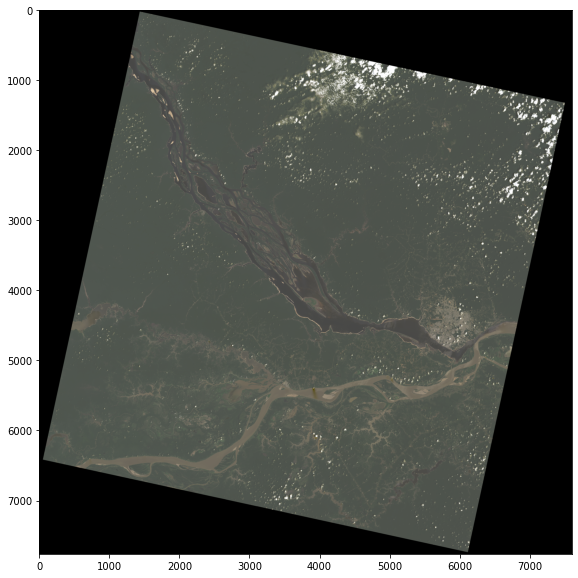

In [14]:
# natural color
img = load_landsat_image('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/', ['B4', 'B3', 'B2'])
display_rgb(img, 'B4', 'B3', 'B2', alpha=2.)

Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B5.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B7.TIF


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


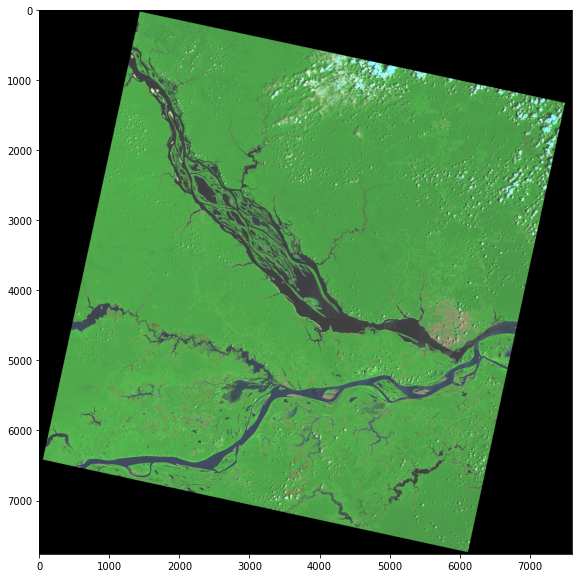

In [15]:
# false color using shortwave infrared B7, near infrared B5 and green.
img = load_landsat_image('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/', ['B3', 'B5', 'B7'])
display_rgb(img, 'B7', 'B5', 'B3', alpha=2.)

In [16]:
def normalized_difference(img, b1, b2, es=0.0001):
    band1 = np.where((img[b1]==0) & (img[b2]==0), np.nan, img[b1])
    band2 = np.where((img[b1]==0) & (img[b2]==0), np.nan, img[b2])

    return (band1 - band2) / (band1 + band2)

In [17]:
img = load_landsat_image('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/', ['B5', 'B4', 'B3'])
# Calculating two indices
ndvi = normalized_difference(img, 'B5', 'B4')
mndwi = normalized_difference(img, 'B3', 'B5')

Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B5.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF


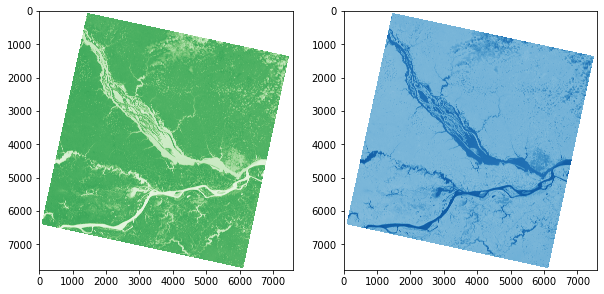

In [18]:
# checking the images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(ndvi, cmap='Greens')
ax[1].imshow(mndwi, cmap='Blues')

In [19]:
water_mask = mndwi > 0.0
water_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

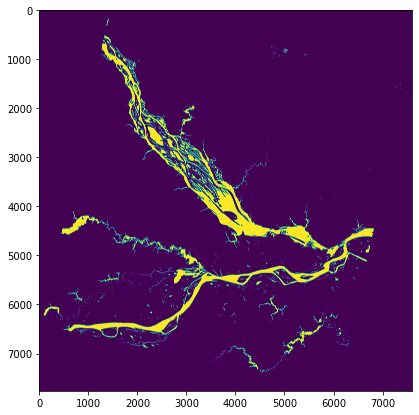

In [20]:
plt.figure(figsize=(7,7))
plt.imshow(water_mask)

### 3 Spectral Analysis

Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


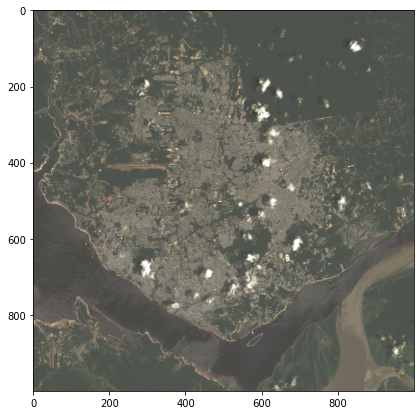

In [22]:
# load the image
img = load_landsat_image('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/', ['B2', 'B3', 'B4'])

# stack the layers to create a cube
rgb = np.stack([img['B4'], img['B3'], img['B2']], axis=-1)

# normalize the values
rgb = rgb/rgb.max() * 2

# display the image with a slightly increased figure size
plt.figure(figsize=(7,7))
plt.imshow(rgb[4000:5000, 5400:6400, 0:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


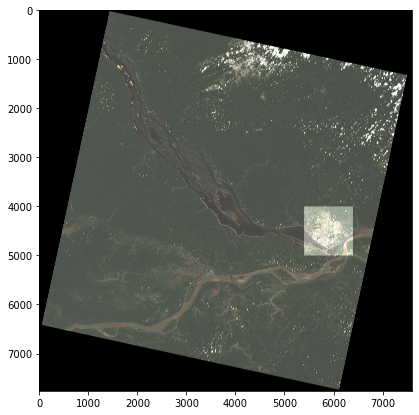

In [24]:
rgb[4000:5000, 5400:6400] = rgb[4000:5000, 5400:6400] * 2
plt.figure(figsize=(7,7))
plt.imshow(rgb)

Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B5.TIF


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


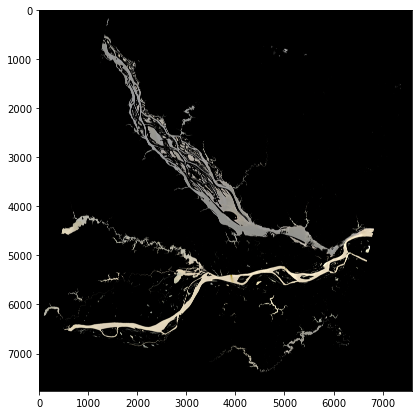

In [25]:
def normalized_difference(img, b1, b2, eps=0.0001):
    band1 = np.where((img[b1]==0) & (img[b2]==0), np.nan, img[b1])
    band2 = np.where((img[b1]==0) & (img[b2]==0), np.nan, img[b2])
    
    return (band1 - band2) / (band1 + band2)

img = load_landsat_image('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/', ['B2', 'B3', 'B4', 'B5'])

# create the normalized rgb cube
rgb = np.stack([img['B4'], img['B3'], img['B2']], axis=-1)
rgb = rgb/rgb.max() * 2

# calc the MNDWI index
mndwi = normalized_difference(img, 'B3', 'B5')

# get a Boolean water mask
water_mask = mndwi > 0.0

# Assign 0 to values outside the mask
rgb[~water_mask] = 0

# display result
plt.figure(figsize=(7,7))
plt.imshow(rgb*2)

Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B5.TIF


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


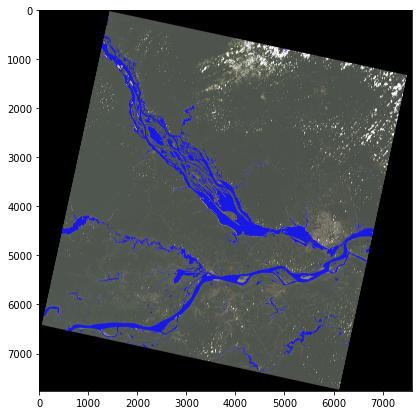

In [26]:
img = load_landsat_image('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/', ['B2', 'B3', 'B4', 'B5'])

# create the normalized rgb cube
rgb = np.stack([img['B4'], img['B3'], img['B2']], axis=-1)
rgb = rgb/rgb.max() * 2

# Assign values R=0.1, G=0.1 and B=0.9 to the water pixels
rgb[water_mask] = [0.1, 0.1, 0.9]

# display result
plt.figure(figsize=(7,7))
plt.imshow(rgb)

In [27]:
bands = ['B1','B2', 'B3', 'B4', 'B5', 'B6', 'B7']
img = load_landsat_image('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/', bands)

Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B1.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B5.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B6.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B7.TIF


In [28]:
def stack_img(img, bands):
  arrays = []                # create an empty list
  for band in bands:         # loop through the bands
    arrays.append(img[band]) # append our array to the arrays list
  return np.stack(arrays, axis=-1)

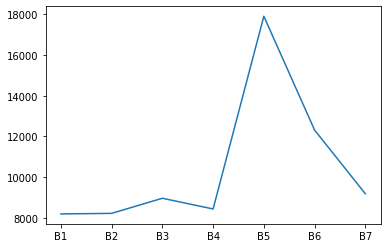

In [31]:
cube = stack_img(img, bands)
plt.plot(bands, cube[4010, 4010])

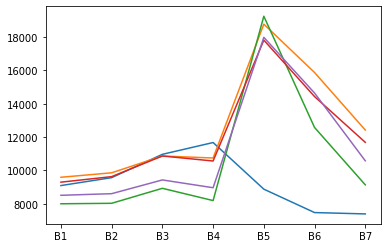

In [32]:
n_index = np.random.randint(4000, 5000, size=(5))
m_index = np.random.randint(5400, 6400, size=(5))

for i in range(5):
    plt.plot(bands, cube[n_index[i], m_index[i]])

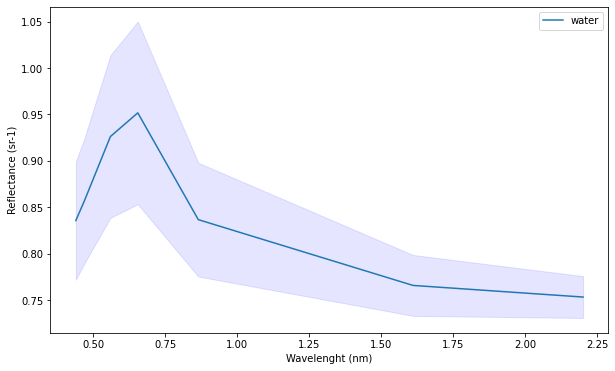

In [33]:
# get the water pixels (remember it has 7 channels)
water_pts = cube[water_mask] / 10000

# create the wavelenghts list
wls = [0.44, 0.47, 0.56, 0.655, 0.865, 1.61, 2.2]

# get mean and std vectors, by reducint in the first axis
mean = water_pts.mean(axis=0)
std = water_pts.std(axis=0)

# plot the spectrum
plt.figure(figsize=(10,6))
plt.plot(wls, mean, label='water')
plt.fill_between(wls, mean-0.5*std, mean+0.5*std, color='blue', alpha=0.1)
plt.xlabel('Wavelenght (nm)')
plt.ylabel('Reflectance (sr-1)')
plt.legend()

In [34]:
ndvi = normalized_difference(img, 'B5', 'B4')
veg_mask = ndvi > 0.25 # adopting a threshold of 0.5 for the vegetation

In [35]:
veg_pts = cube[veg_mask]/10000
veg_mean = veg_pts.mean(axis=0)
veg_std = veg_pts.std(axis=0)

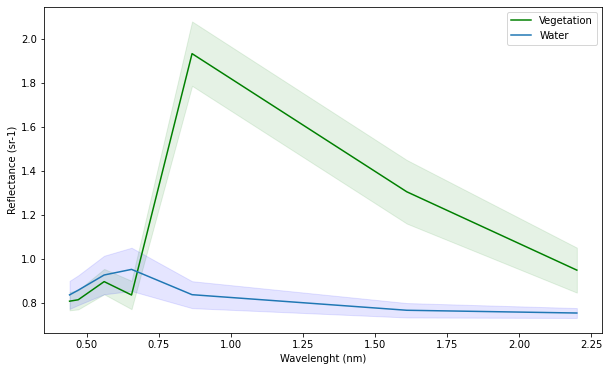

In [36]:
# plot the spectrum
plt.figure(figsize=(10,6))

# plot vegetation
plt.plot(wls, veg_mean, label='Vegetation', color='green')
plt.fill_between(wls, veg_mean-veg_std, veg_mean+veg_std, color='green', alpha=0.1)

# plot water
plt.plot(wls, mean, label='Water')
plt.fill_between(wls, mean-0.5*std, mean+0.5*std, color='blue', alpha=0.1)

plt.xlabel('Wavelenght (nm)')
plt.ylabel('Reflectance (sr-1)')
plt.legend()

### 4 Raster bit masks explained

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from pathlib import Path

def load_landsat_image(img_folder, bands):
    image = {}
    path = Path(img_folder)
    for band in bands:
        # considering the landsat images end with *_SR_B#.TIF, we will use it to locate the correct file
        file = next(path.glob(f'*{band}.tif'))
        print(f'Opening file {file}')
        ds = rasterio.open(file)
        image.update({band: ds.read(1)})

    return image

# load the image
img = load_landsat_image('E:/Data/LC08_L2SP_231062_20201026_20201106_02_T1/', ['B2', 'B3', 'B4', 'QA_PIXEL'])

img['QA_PIXEL']

Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF
Opening file E:\Data\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_QA_PIXEL.TIF


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint16)